# Principal Component Analysis 

## Example 1: a 2D monochrome image

In this example, a monochrome image of an object is processed with principal component analysis to get a feel of what the method does and how the results are to be interpreted.

In [1]:
# ...
from PIL import Image

# ...
import numpy as np

# ...
import matplotlib.pyplot as plt

### Reading the data

In [2]:
giraf = Image.open('272-2722857_giraffe-svg-vector-file-giraffe-animal-drawing-hd.png')

In [23]:
# 4 colors: red, green, blue, alpha (transparency)
giraf.getcolors()

[(757497, (247, 247, 247, 255)),
 (1347, (245, 245, 245, 255)),
 (1038, (243, 243, 243, 255)),
 (1002, (241, 241, 241, 255)),
 (754, (239, 239, 239, 255)),
 (791, (237, 237, 237, 255)),
 (729, (235, 235, 235, 255)),
 (719, (233, 233, 233, 255)),
 (430, (201, 201, 201, 255)),
 (385, (199, 199, 199, 255)),
 (405, (197, 197, 197, 255)),
 (446, (195, 195, 195, 255)),
 (406, (193, 193, 193, 255)),
 (381, (191, 191, 191, 255)),
 (432, (189, 189, 189, 255)),
 (368, (187, 187, 187, 255)),
 (410, (185, 185, 185, 255)),
 (396, (183, 183, 183, 255)),
 (469, (181, 181, 181, 255)),
 (367, (179, 179, 179, 255)),
 (395, (177, 177, 177, 255)),
 (431, (175, 175, 175, 255)),
 (362, (173, 173, 173, 255)),
 (392, (171, 171, 171, 255)),
 (353, (139, 139, 139, 255)),
 (335, (137, 137, 137, 255)),
 (390, (135, 135, 135, 255)),
 (361, (133, 133, 133, 255)),
 (446, (131, 131, 131, 255)),
 (325, (129, 129, 129, 255)),
 (353, (127, 127, 127, 255)),
 (366, (125, 125, 125, 255)),
 (330, (107, 107, 107, 255)),
 (35

### Convert data to array

In [34]:
# np.array(giraf[:, :, 0] < 100) returns a boolean where True if color R will be < 100.
X = np.array(np.where(np.array(giraf)[:, :, 0] < 100)).T

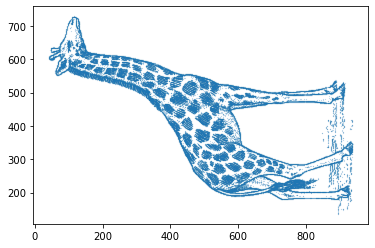

In [35]:
plt.scatter(*X.T, s=0.01)
plt.show()

### Centering the data

In [5]:
mean = X.mean(axis=0) # Most of the time a good idea to keep the mean
X = X - X.mean() # This casts the type to float (so you can't use -=)

### Calculating the covariance matrix

In [6]:
S = X.T @ X / (len(X) - 1)

### Eigenvector decomposition

In [7]:
# 

eigenvalues, eigenvectors = np.linalg.eig(S)

order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

In [8]:
print('Eigenvalues:\n', eigenvalues, '\n')
print('Eigenvectors:\n', eigenvectors, '\n')

Eigenvalues:
 [59890.48198556  7576.3083471 ] 

Eigenvectors:
 [[ 0.87767666  0.47925325]
 [-0.47925325  0.87767666]] 



In [9]:
print('Determinant of eigenvectors:\n', np.linalg.det(eigenvectors), '\n')
print('Inner product of eigenvectors:\n', np.round(eigenvectors @ eigenvectors.T, 3), '\n')

Determinant of eigenvectors:
 1.0 

Inner product of eigenvectors:
 [[ 1. -0.]
 [-0.  1.]] 



In [10]:
print('Sum of eigenvalues:\n', sum(eigenvalues), '\n')
print('Sum of variances:\n', sum(np.diagonal(S)), '\n')

Sum of eigenvalues:
 67466.79033265923 

Sum of variances:
 67466.79033265923 



In [11]:
print('Percentage of total variance per eigenvalue:\n', eigenvalues * 100 / np.sum(eigenvalues), '\n')
print('Cumulative sum:\n', eigenvalues.cumsum() * 100 / np.sum(eigenvalues), '\n')

Percentage of total variance per eigenvalue:
 [88.77031454 11.22968546] 

Cumulative sum:
 [ 88.77031454 100.        ] 



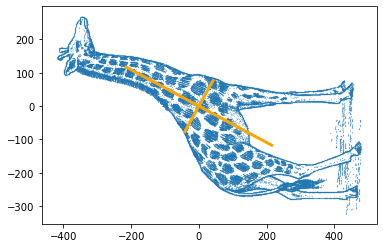

In [12]:
plt.scatter(*X.T, s=0.01)
for idx in 0, 1:
    a, b = eigenvalues[idx]**0.5 * eigenvectors[:, idx]
    plt.plot((-a, a), (-b, b), c='orange', linewidth=3)
plt.show()

### Scores (projections of data onto eigenvectors)

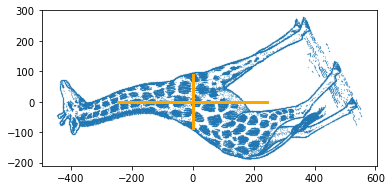

In [13]:
Z = X @ eigenvectors 
fig, ax = plt.subplots()
plt.scatter(*Z.T, s=0.01)
ax.set_aspect('equal')
for idx in 0, 1:
    a, b = eigenvalues[idx]**0.5 * np.eye(2)[idx]
    plt.plot((-a, a), (-b, b), c='orange', linewidth=3)
plt.show()

### Eigenvectors and rotation

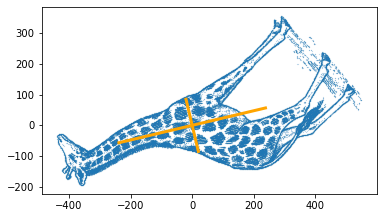

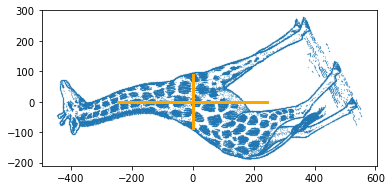

In [14]:
import random

angle = random.random() * 2 * np.pi
R = np.array(((np.cos(angle), -np.sin(angle)), (np.sin(angle), np.cos(angle))))

Y = X @ R
yvals, yvecs = np.linalg.eig(Y.T @ Y / (len(Y) - 1))
order = yvals.argsort()[::-1]
yvals = yvals[order]
yvecs = yvecs[:, order]

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(*Y.T, s=0.01)
for idx in 0, 1:
    a, b = yvals[idx]**0.5 * yvecs[:, idx]
    plt.plot((-a, a), (-b, b), c='orange', linewidth=3)
plt.show()

ZY = Y @ yvecs
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(*ZY.T, s=0.01)
for idx in 0, 1:
    a, b = yvals[idx]**0.5 * np.eye(2)[idx]
    plt.plot((-a, a), (-b, b), c='orange', linewidth=3)
plt.show()

In [ ]:
print('Covariance matrix of rotated data:\n', np.round(Z.T @ Z / (len(Z) - 1), 3))
print('Eigenvalues:\n', eigenvalues)